In [34]:
from src.dataset import *
import matplotlib.pyplot as plt
import random

def show_images_before_after(data_dir, label_file, num_images=3):
    # 不使用任何变换，获取原始图片
    original_dataset = PetAgeDataset(data_dir, label_file, transform=None)

    # 获取训练集的变换
    train_transform, _ = get_transforms()
    transformed_dataset = PetAgeDataset(data_dir, label_file, transform=train_transform)

    # 随机选择一些索引
    indices = random.sample(range(len(original_dataset)), num_images)

    # 创建子图
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

    for i, idx in enumerate(indices):
        # 获取原始图片
        original_image, _ = original_dataset[idx]
        # 获取处理后的图片
        transformed_image, _ = transformed_dataset[idx]

        # 显示原始图片
        axes[0, i].imshow(original_image)
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')

        # 处理后的图片需要转换为合适的格式
        transformed_image = transformed_image.numpy().transpose(1, 2, 0)
        # 反归一化
        transformed_image = transformed_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        # 显示处理后的图片
        axes[1, i].imshow(np.clip(transformed_image, 0, 1))
        axes[1, i].axis('off')
        axes[1, i].set_title('Transformed')

    plt.show()

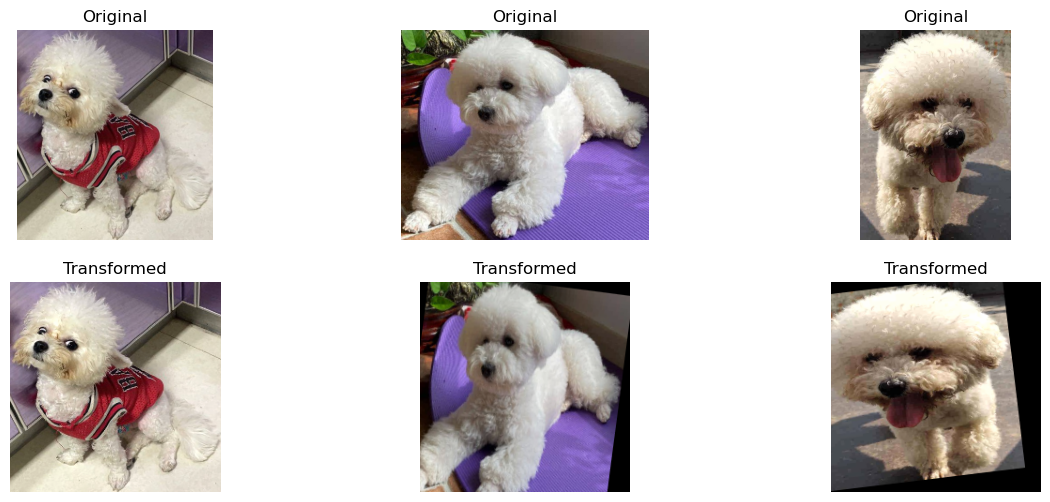

In [39]:
train_dir = '/home/ecaps7/Pet/data/trainset'
val_dir = '/home/ecaps7/Pet/data/valset'
train_label_file = '/home/ecaps7/Pet/data/annotations/train.txt'
val_label_file = '/home/ecaps7/Pet/data/annotations/val.txt'

show_images_before_after(train_dir, train_label_file)